### Exploratory Data Analysis (EDA) World Happines

This analysis aims to explore analysis with an indicator approach that influences whether a country can be said to be happy. "World Happiness" of a country with the following indicators:
- Peringkat Negara Bahagia
- Nama Negara
- Penilaian Masyarakat Secara Umum 
- GDP per Kapita 
- Bantuan Sosial 
- Harapan Hidup 
- Kebebasan dalam Memilih
- Kemurahan Hati Masyarakatnya
- Pandangan Korupsi terhadap Bangsanya

In [ ]:
#### Import Library

In [2]:
import pandas as pd
import requests

#Panggil data CSV
data = pd.read_csv('Angka Kebahagiaan Negara Tahun 2019.csv')
data.head()

,Peringkat,Negara,Penilaian Masyarakat Secara Umum,GDP per capita,Bantuan Sosial,Harapan Hidup,Kebebasan dalam Memilih,Kemurahan Hati,Pandangan Korupsi
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### A. Simplifying DataFrame

Simplifying does not mean reducing the integrity of the existing data, but the meaning of simplifying is forming data so that we can process it more easily, such as abbreviating column names or reducing columns that are not included in the calculation so that it is more efficient.

First we shorten the name of each column 

In [ ]:
Peringkat Negara Bahagia = Peringkat
Nama Negara = Negara
Penilaian Masyarakat Secara Umum = Skor
GDP per Kapita = GDP
Bantuan Sosial = BS
Harapan Hidup = HH
Kebebasan dalam Memilih = Freedom
Kemurahan Hati Masyarakatnya = Keramahan
Pandangan Korupsi terhadap Bangsanya = Korupsi

Next, we create a temporary dataframe with the column names that we have abbreviated above:

In [3]:
TempData ={'Peringkat'  : data["Peringkat"],
        'Negara'  : data["Negara"],
        'Skor'  : data["Penilaian Masyarakat Secara Umum"],
        'GDP'  : data["GDP per capita"],
        'BS'  : data["Bantuan Sosial"],
        'HH'  : data["Harapan Hidup"],
        'Freedom' : data["Kebebasan dalam Memilih"],
        'Keramahan'  : data["Kemurahan Hati"],
        'Korupsi'  : data["Pandangan Korupsi"]}
df = pd.DataFrame(TempData)
df.head()

,Peringkat,Negara,Skor,GDP,BS,HH,Freedom,Keramahan,Korupsi
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


Since we are calculating the data nominally, we can reduce/ignore the two columns [Peringkat dan Negara] which contain ordinal and string data:

In [4]:
#Drop Kolom
df.drop(columns=['Peringkat','Negara'],axis = 1, inplace=True)

df.head()

,Skor,GDP,BS,HH,Freedom,Keramahan,Korupsi
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298


To find out the proximity or correlation of each indicator, we can use correlation. We use the seaborn library:

<Axes: >

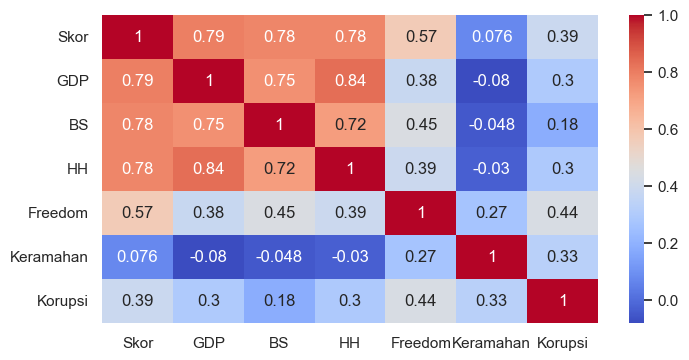

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc = {'figure.figsize':(8,4)})
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

From the matrix, we can see that Life Expectancy: HH and Income per capita: GDP of society have the largest correlation with 0.84. Why is that, because in reality, life expectancy is directly proportional to income per capita of society. the higher the income of a country, the higher the life expectancy. Is this enough? Of course not! Let's continue...

Let's see with histogram data, the 10 countries with the highest GDP:

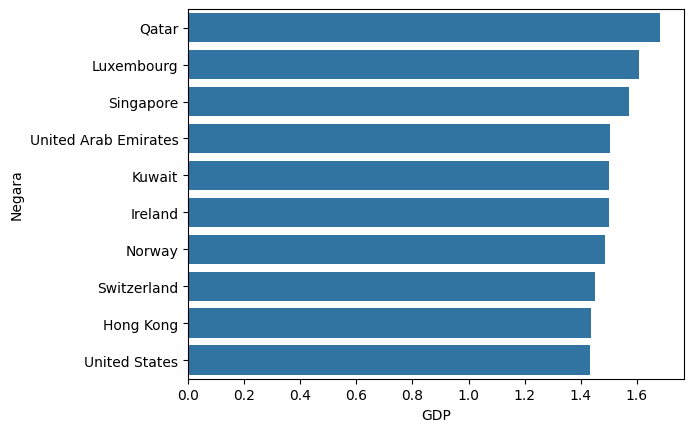

In [2]:
GDP = df.sort_values(by=['GDP'],ascending=[False])
import seaborn
import matplotlib.pyplot as plt
seaborn.barplot(y = GDP['Negara'].head(10),x = GDP['GDP'].head(10),orient = 'h')

plt.show()

Amazing ya, it turns out that the 10 countries with the highest income are evenly distributed and come from various continents. so curious what rank Indonesia is ?

In [3]:
TempData = data
TempData.set_index('Negara', inplace=True)
TempData.loc['Indonesia']

Peringkat                           92.000
Penilaian Masyarakat Secara Umum     5.192
GDP per capita                       0.931
Bantuan Sosial                       1.203
Harapan Hidup                        0.660
Kebebasan dalam Memilih              0.491
Kemurahan Hati                       0.498
Pandangan Korupsi                    0.028
Name: Indonesia, dtype: float64

wow... it turns out Indonesia is ranked 92nd, between half and half happy.... (just a joke!!).

hm....if so, does a country have any influence on its view of corruption??? to answer that, let's look at the 10 countries with the lowest levels of corruption

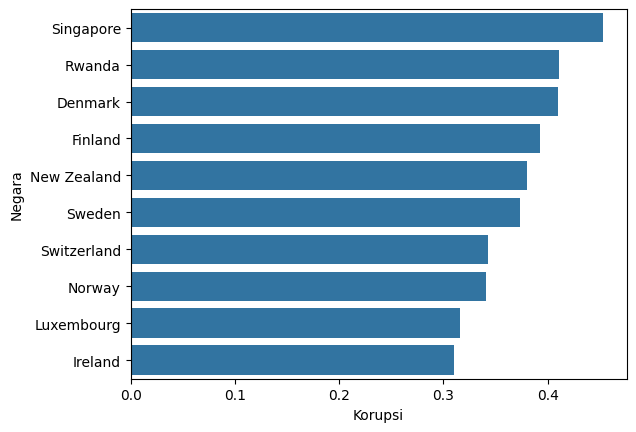

In [4]:
# 10 Negara dengan Perceptions of corruption tertinggi.
KPK = df.sort_values(by=['Korupsi'],ascending=[False])
import seaborn
import matplotlib.pyplot as plt
seaborn.barplot(y = KPK['Negara'].head(10),x = KPK['Korupsi'].head(10),orient = 'h')

plt.show()

Our neighbor is also in the low corruption ranking, so the GDP is high but the corruption view is also low huh. wow it's getting more interesting....so what are the factors that make the country happy?

From the data we have not been able to conclude clearly, but we can reflect that happiness is like a part of us, namely family and long life, if we look at GDP then we can find the best correlation between the existing indicators. So the answer is in the Life Expectancy figure: HH. For that, let's look at 10 countries with high GDP and Life Expectancy (HH).

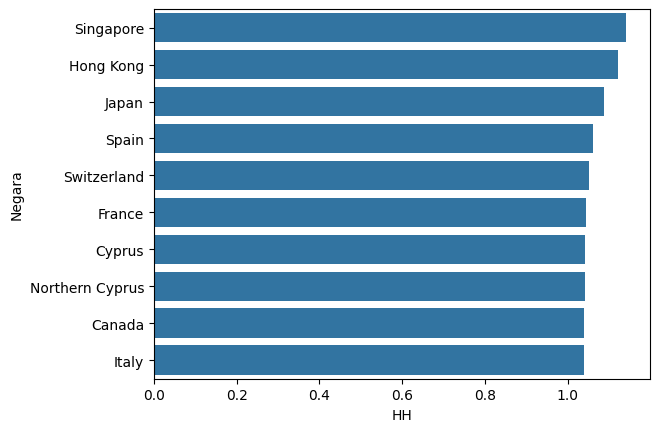

In [5]:
# 10 Negara dengan Pendapatan Per Kapita dan Angka Harapan Hidup tertinggi.
smile = df.sort_values(by=['HH','GDP'],ascending=[False,False])
import seaborn
import matplotlib.pyplot as plt
seaborn.barplot(y = smile['Negara'].head(10),x = smile['HH'].head(10),orient = 'h')

plt.show()

It turns out that in addition to high income, high life expectancy is also found in Singapore. Apart from the data above, perhaps the facilities provided by the country also affect it...

However, this condition does not necessarily conclude that living in a country that is not on the list or is at the bottom of the standings is unhappy, there are many factors that influence the happiness of a society in a country. The most important thing is to live life with gratitude, share with others and be responsible so that we are always happy.